# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


In [2]:
import pandas as pd
import numpy as np

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Number of classes in valid and test =", len(np.unique(y_valid)), len(np.unique(y_test)))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Number of classes in valid and test = 43 43


### Exploratory visualization of the dataset

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
df = pd.read_csv('signnames.csv')

In [6]:
np.random.seed()

#### Plotting a random sample of traffic signs

In [7]:
def plot_random(X, y, names, n_samples = 10):
    """
    plot n_samples random signs and their names
    """
    assert(X.shape[0] == y.shape[0])
    samples = np.random.choice(X.shape[0], size = n_samples, replace=False)
    n_per_row = 2
    nrows = int(np.ceil(n_samples/n_per_row))
    for i,idx in enumerate(samples):
        plt.subplot(nrows,n_per_row,i+1)
        plt.imshow(X[idx])
        plt.title(names.loc[y[idx],'SignName'])
    plt.tight_layout()
    plt.show()

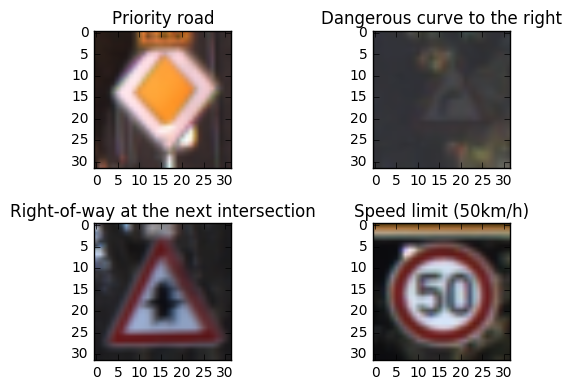

In [8]:
plot_random(X_train, y_train, df, n_samples=4)

We see that most signs seem to be centered. Some signs are very dark. There are also overlapping signs (a different traffic sign in the background, etc.) Colors of some signs seem a bit off.

#### Basic statistics of the train and validation set

In [9]:
df['train_counts'] = np.bincount(y_train)
df['train_ratio'] = df['train_counts'] / df['train_counts'].sum()
df['valid_counts'] = np.bincount(y_valid)
df['valid_ratio'] = df['valid_counts'] / df['valid_counts'].sum()

In [10]:
df

,ClassId,SignName,train_counts,train_ratio,valid_counts,valid_ratio
0,0,Speed limit (20km/h),180,0.005173,30,0.006803
1,1,Speed limit (30km/h),1980,0.056898,240,0.054422
2,2,Speed limit (50km/h),2010,0.057760,240,0.054422
3,3,Speed limit (60km/h),1260,0.036208,150,0.034014
4,4,Speed limit (70km/h),1770,0.050864,210,0.047619
5,5,Speed limit (80km/h),1650,0.047415,210,0.047619
6,6,End of speed limit (80km/h),360,0.010345,60,0.013605
7,7,Speed limit (100km/h),1290,0.037070,150,0.034014
8,8,Speed limit (120km/h),1260,0.036208,150,0.034014
9,9,No passing,1320,0.037932,150,0.034014


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

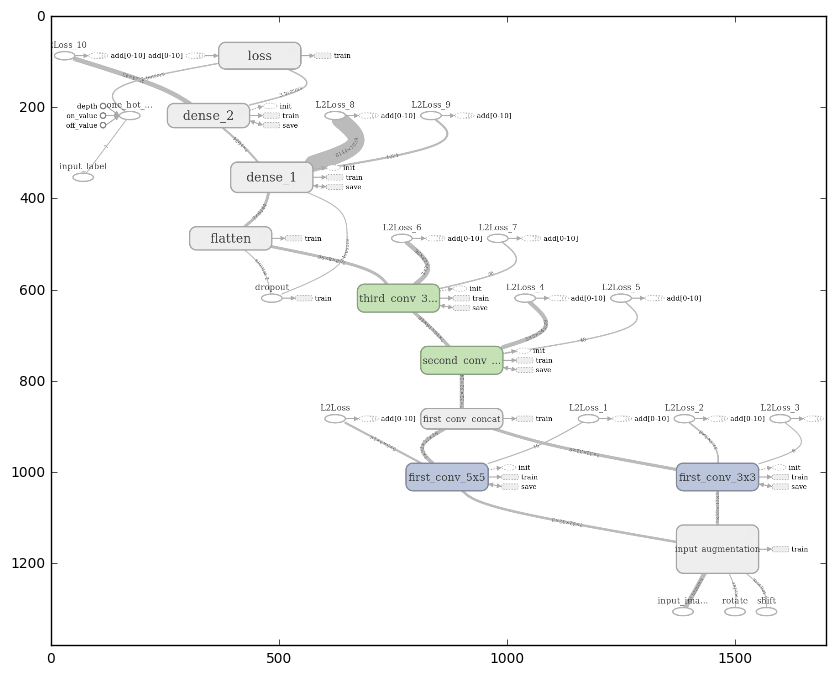

In [718]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('architecture.png')[:,:1700])

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [179]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def data_normalization(X):
    """per image centering and clipping"""
    mu = np.mean(X, axis=(1,2,3))
    sigma = np.std(X, axis=(1,2,3))
    mu = np.expand_dims(np.expand_dims(np.expand_dims(mu,-1), -1), -1)
    sigma = np.expand_dims(np.expand_dims(np.expand_dims(sigma,-1), -1), -1)
    return np.clip((X-mu)/sigma, -7.5,7.5)


In [180]:
X_train_norm = data_normalization(X_train)
X_valid_norm = data_normalization(X_valid)
X_test_norm = data_normalization(X_test)

### A function to shuffle the data

In [13]:
from sklearn.utils import shuffle

def shuffle_data(X,y):
    return shuffle(X,y)

### Model Architecture

In [14]:
import tensorflow as tf

In [657]:
def rotate_op(x, rotate):
    return tf.contrib.image.rotate(x, tf.truncated_normal([tf.shape(x)[0]], mean=0, stddev=rotate))

def shift_op(x, shift):
    shift_matrix = tf.concat(\
        [tf.ones([tf.shape(x)[0],1]), tf.zeros([tf.shape(x)[0],1]), \
         tf.cast(tf.random_uniform([tf.shape(x)[0],1], -shift, shift+1, dtype=tf.int32), tf.float32), \
         tf.zeros([tf.shape(x)[0],1]), tf.ones([tf.shape(x)[0],1]), \
         tf.cast(tf.random_uniform([tf.shape(x)[0],1], -shift, shift+1, dtype=tf.int32), tf.float32), \
         tf.zeros([tf.shape(x)[0],1]), tf.zeros([tf.shape(x)[0],1]), \
        ], 1)
    return tf.contrib.image.transform(x, shift_matrix)


In [797]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def Net(x, kp, rotate, shift):
    init_sigma = 0.05
    weights = []
    
    with tf.name_scope('input_augmentation'):
        x_aug = rotate_op(x, rotate)
        x_aug = shift_op(x, shift)
    
    with tf.name_scope('first_conv_5x5'):
        wc1_5 = tf.Variable(tf.random_normal((5,5,3,16), mean=0, stddev=init_sigma))
        bc1_5 = tf.Variable(tf.zeros((16,)))
        conv1_5 = tf.nn.conv2d(x_aug, wc1_5, strides=[1,1,1,1], padding='SAME') + bc1_5
        conv1_5 = tf.nn.relu(conv1_5)
        weights += [wc1_5, bc1_5]

    with tf.name_scope('first_conv_3x3'):
        wc1_3 = tf.Variable(tf.random_normal((3,3,3,8), mean=0, stddev=init_sigma))
        bc1_3 = tf.Variable(tf.zeros((8,)))
        conv1_3 = tf.nn.conv2d(x_aug, wc1_3, strides=[1,1,1,1], padding='SAME') + bc1_3
        conv1_3 = tf.nn.relu(conv1_3)
        weights += [wc1_3, bc1_3]
    
    with tf.name_scope('first_conv_concat'):
        conv1 = tf.concat([conv1_5, conv1_3], axis=3)

    with tf.name_scope('second_conv_5x5'):
        wc2 = tf.Variable(tf.random_normal((5,5,24,48), mean=0, stddev=init_sigma))
        bc2 = tf.Variable(tf.zeros((48,)))
        conv2 = tf.nn.conv2d(conv1, wc2, strides=[1,1,1,1], padding='SAME') + bc2
        conv2 = tf.nn.relu(conv2)
        conv2 = tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], padding='VALID')
        weights += [wc2, bc2]

    with tf.name_scope('third_conv_3x3'):
        wc3 = tf.Variable(tf.random_normal((3,3,48,96), mean=0, stddev=init_sigma))
        bc3 = tf.Variable(tf.zeros((96,)))
        conv3 = tf.nn.conv2d(conv2, wc3, strides=[1,1,1,1], padding='SAME') + bc3
        conv3 = tf.nn.relu(conv3)
        conv3 = tf.nn.max_pool(conv3, [1,2,2,1], [1,2,2,1], padding='VALID')
        weights += [wc3, bc3]
    
    with tf.name_scope('flatten'):
        flatten = tf.reshape(conv3, [-1, 8*8*96])
        flatten = tf.nn.dropout(flatten, kp)
    
    with tf.name_scope('dense_1'):
        wd1 = tf.Variable(tf.random_normal((8*8*96, 1024), mean=0, stddev=init_sigma))
        bd1 = tf.Variable(tf.zeros((1024,)))
        dense1 = tf.matmul(flatten, wd1) + bd1
        dense1 = tf.nn.relu(dense1)
        dense1 = tf.nn.dropout(dense1, kp)
        weights += [wd1, bd1]

    with tf.name_scope('dense_2'):
        wd3 = tf.Variable(tf.random_normal((1024,43), mean=0, stddev=init_sigma))
        dense3 = tf.matmul(dense1, wd3)
        weights += [wd3]
    
    return dense3, sum(tf.nn.l2_loss(w) for w in weights), conv1, conv2, conv3

In [798]:
tf.reset_default_graph()
X_input = tf.placeholder(tf.float32, [None,32,32,3], name='input_image')
y_input = tf.placeholder(tf.int32, [None], name='input_label')
y_one_hot = tf.one_hot(y_input, 43, name='one_hot_label')
keep_prob = tf.placeholder(tf.float32, shape=[], name='dropout')
rotate_range = tf.placeholder(tf.float32, shape=[], name='rotate')
shift_range = tf.placeholder(tf.int32, shape=[], name='shift')

In [799]:
trafficnet, reg, act1, act2, act3 = Net(X_input, keep_prob, rotate_range, shift_range)

### Train, Validate and Test the Model

Plotting the confusion matrix from previous models revealed that images from a few classes are often labeled wrong. Below we collect images from those classes. The idea is to add to each minibatch more samples from these weak classes.

In [800]:
weak_labels = [16, 40, 41]
weak_indices = np.in1d(y_train, weak_labels)
X_weak = X_train_norm[weak_indices]
y_weak = y_train[weak_indices]
print(X_weak.shape, X_train_norm.shape, y_weak.shape, y_train.shape)

(870, 32, 32, 3) (34799, 32, 32, 3) (870,) (34799,)


In [801]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

epochs = 30
batch_size = 1024
weak_batch_size = 32
learning_rate = 0.001
beta = 0.001
num_ensemble = 3

with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=trafficnet, labels=y_one_hot)
    loss = tf.reduce_mean(cross_entropy) + beta*reg

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss)


In [802]:
def evaluate(X_data, y_data):
    confusion = np.zeros((43,43))
    sess = tf.get_default_session()
    
    predicts = tf.argmax(trafficnet, 1)
    labels = tf.argmax(y_one_hot, 1)
    
    accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(trafficnet, 1), tf.argmax(y_one_hot,1)), tf.float32))
    total_accuracy = 0
    for start in range(0, X_data.shape[0], batch_size):
        batch_predicts, batch_labels, batch_accuracy = sess.run([predicts, labels, accuracy], feed_dict={\
                        X_input:X_data[start:start+batch_size], \
                        y_input:y_data[start:start+batch_size], \
                        keep_prob:1., \
                        rotate_range: 0, shift_range:0})
        total_accuracy += batch_accuracy
        confusion += np.histogram2d(batch_predicts, batch_labels, bins=[43,43], range=[[0,43],[0,43]])[0]
    return 1.0*total_accuracy / X_data.shape[0], confusion

def evaluate_ensemble(model_names, X_data, y_data):
    results = np.zeros((y_data.shape[0],43))
    
    with tf.Session() as sess:
        for m in model_names:
            print(m)
            saver.restore(sess, m)
    
            for start in range(0, X_data.shape[0], batch_size):
                batch_predicts = sess.run(trafficnet, feed_dict={\
                        X_input:X_data[start:start+batch_size], \
                        y_input:y_data[start:start+batch_size], \
                        keep_prob:1., \
                        rotate_range: 0, shift_range:0})
                results[start:start+batch_size] += batch_predicts
    
    label_predicts = np.argmax(results, axis=1)
    total_accuracy = np.sum(label_predicts==y_data)
    confusion = np.histogram2d(label_predicts, y_data, bins=[43,43], range=[[0,43],[0,43]])[0]
    return 1.0*total_accuracy / X_data.shape[0], confusion

def evaluate_proba(model_names, X_data):
    results = np.zeros((X_data.shape[0],43))
    
    with tf.Session() as sess:
        for m in model_names:
            print(m)
            saver.restore(sess, m)
    
            for start in range(0, X_data.shape[0], batch_size):
                batch_predicts = sess.run(trafficnet, feed_dict={\
                        X_input:X_data[start:start+batch_size], \
                        y_input:np.zeros(min(batch_size, X_data.shape[0]-start)), \
                        keep_prob:1., \
                        rotate_range: 0, shift_range:0})
                results[start:start+batch_size] += batch_predicts
    
    return results

In [803]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8

In [804]:
weak_train_ptr = 0
saver = tf.train.Saver()
logdir = '/dev/shm/train'

with tf.Session(config=config) as sess:
    train_writer = tf.summary.FileWriter(logdir, sess.graph)
    train_writer.close()
    for i in range(num_ensemble):
        print('model {0}'.format(i))
        sess.run(tf.global_variables_initializer())
        for j in range(epochs):
            X_current, y_current = shuffle_data(X_train_norm, y_train)
            for start in range(0, X_current.shape[0], batch_size):
                if weak_train_ptr >= X_weak.shape[0]:
                    X_weak, y_weak = shuffle_data(X_weak, y_weak)
                    weak_train_ptr = 0
                X_batch, y_batch = np.concatenate([X_current[start:start+batch_size], \
                                            X_weak[weak_train_ptr:weak_train_ptr+weak_batch_size]]), \
                                   np.concatenate([y_current[start:start+batch_size], \
                                            y_weak[weak_train_ptr:weak_train_ptr+weak_batch_size]])
                weak_train_ptr += weak_batch_size
                sess.run(train_op, feed_dict={\
                        X_input:X_batch, y_input:y_batch, \
                        keep_prob:0.5 if i<10 else 0.2, \
                        rotate_range:np.pi/36, shift_range:1})
            train_score, _ = evaluate(X_train_norm, y_train)
            validate_score, validate_confusion = evaluate(X_valid_norm, y_valid)
            print('epoch {0} train accuracy {1:.3f} validation accuracy {2:.3f}'.format(j,train_score, validate_score))
        saver.save(sess, 'models/{0}.ckpt'.format(i))

model 0
epoch 0 train accuracy 0.632 validation accuracy 0.546
epoch 1 train accuracy 0.926 validation accuracy 0.832
epoch 2 train accuracy 0.983 validation accuracy 0.917
epoch 3 train accuracy 0.994 validation accuracy 0.946
epoch 4 train accuracy 0.997 validation accuracy 0.949
epoch 5 train accuracy 0.999 validation accuracy 0.958
epoch 6 train accuracy 0.998 validation accuracy 0.954
epoch 7 train accuracy 0.999 validation accuracy 0.963
epoch 8 train accuracy 0.999 validation accuracy 0.961
epoch 9 train accuracy 0.999 validation accuracy 0.961
epoch 10 train accuracy 1.000 validation accuracy 0.966
epoch 11 train accuracy 1.000 validation accuracy 0.966
epoch 12 train accuracy 1.000 validation accuracy 0.967
epoch 13 train accuracy 0.999 validation accuracy 0.963
epoch 14 train accuracy 1.000 validation accuracy 0.974
epoch 15 train accuracy 1.000 validation accuracy 0.971
epoch 16 train accuracy 0.999 validation accuracy 0.974
epoch 17 train accuracy 1.000 validation accuracy 

In [805]:
validate_score, validate_confusion = evaluate_ensemble(['models/{0}.ckpt'.format(i) for i in range(3)], X_valid_norm, y_valid)

models/0.ckpt
models/1.ckpt
models/2.ckpt


In [806]:
validate_score

0.97936507936507933

In [807]:
test_score, test_confusion = evaluate_ensemble(['models/{0}.ckpt'.format(i) for i in range(3)], X_test_norm, y_test)

models/0.ckpt
models/1.ckpt
models/2.ckpt


In [808]:
test_score

0.97466349960411713

In [809]:
def plot_confusion(confusion):
    confusion_norm = confusion/np.sum(confusion, axis=0)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xticks(np.arange(0,43,1))
    plt.yticks(np.arange(0,43,1))
    plt.imshow(confusion_norm, interpolation='nearest')

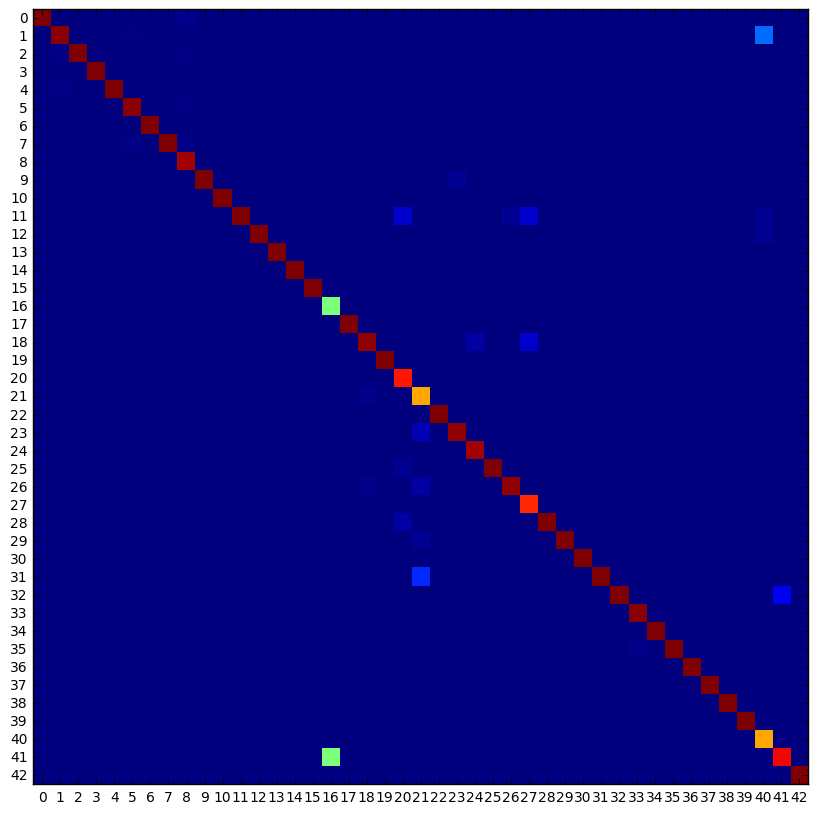

In [810]:
plot_confusion(validate_confusion)

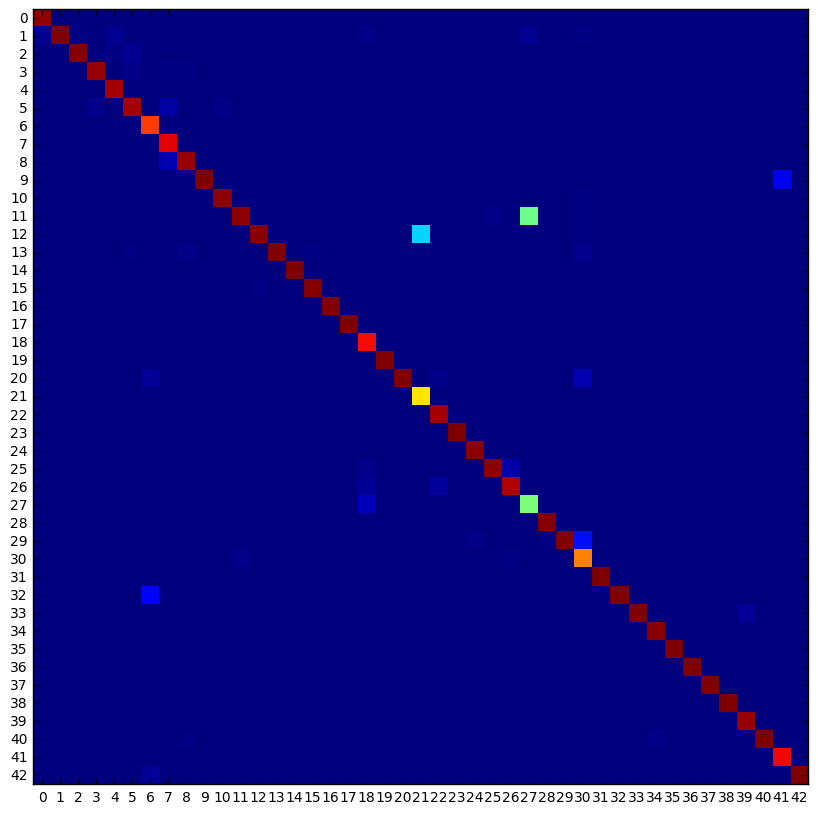

In [811]:
plot_confusion(test_confusion)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

The images chosen here are from classes on which the model performed badly. Some of the signs are also non-standard, so the expectation is that the model will make mistakes.

In [812]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

new_tests = np.stack([mpimg.imread('extra/{0}e.jpg'.format(i+1)) for i in range(5)])

In [813]:
new_tests.shape

(5, 32, 32, 3)

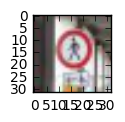

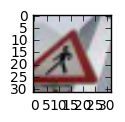

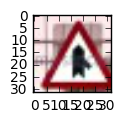

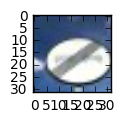

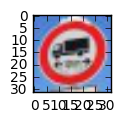

In [815]:
for img in new_tests:
    plt.rcParams["figure.figsize"] = (1,1)
    plt.figure()
    plt.imshow(img)

### Predict the Sign Type for Each Image

We first normalize the data, and then run the predictions.

In [816]:
new_tests_norm = data_normalization(new_tests)
new_labels = np.array([27,27,11,41,16])

In [817]:
results = evaluate_proba(['models/{0}.ckpt'.format(i) for i in range(3)], new_tests_norm)
results = np.exp(results)
results = results / np.expand_dims(np.sum(results, axis=1), axis=1)

models/0.ckpt
models/1.ckpt
models/2.ckpt


### Analyze Performance

In [818]:
np.argmax(results,axis=1)

array([ 2, 18, 11, 20, 16])

We see that the accuracy is only 40%. Given that we chose hard examples on purpose, this is perhaps not surprising. Let's have a look a the top 5 Softmax probabilities of them.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [819]:
top5ind = np.argpartition(results, -5)[:,-5:]

In [820]:
for i in range(5):
    print(i, new_labels[i], '\t'.join('{0}:{1:.5f}'.format(x,y) for x,y in zip(top5ind[i], results[i][top5ind[i]])))

0 27 38:0.00045	21:0.00051	40:0.11454	2:0.88284	1:0.00104
1 27 28:0.00000	25:0.00009	27:0.00001	20:0.07854	18:0.92136
2 11 30:0.00000	21:0.00000	28:0.00000	11:1.00000	27:0.00000
3 41 13:0.00003	6:0.13920	41:0.00726	32:0.17612	20:0.67738
4 16 7:0.00000	8:0.00000	3:0.00000	16:0.99985	5:0.00015


The model seems to be pretty confident even when it is wrong.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [837]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=tf.get_default_session(),feed_dict={X_input : image_input, y_input:[0], \
                        keep_prob:1., \
                        rotate_range: 0, shift_range:0})
    featuremaps = activation.shape[3]
    print(featuremaps)
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(np.ceil(featuremaps/8).astype(int) ,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

96


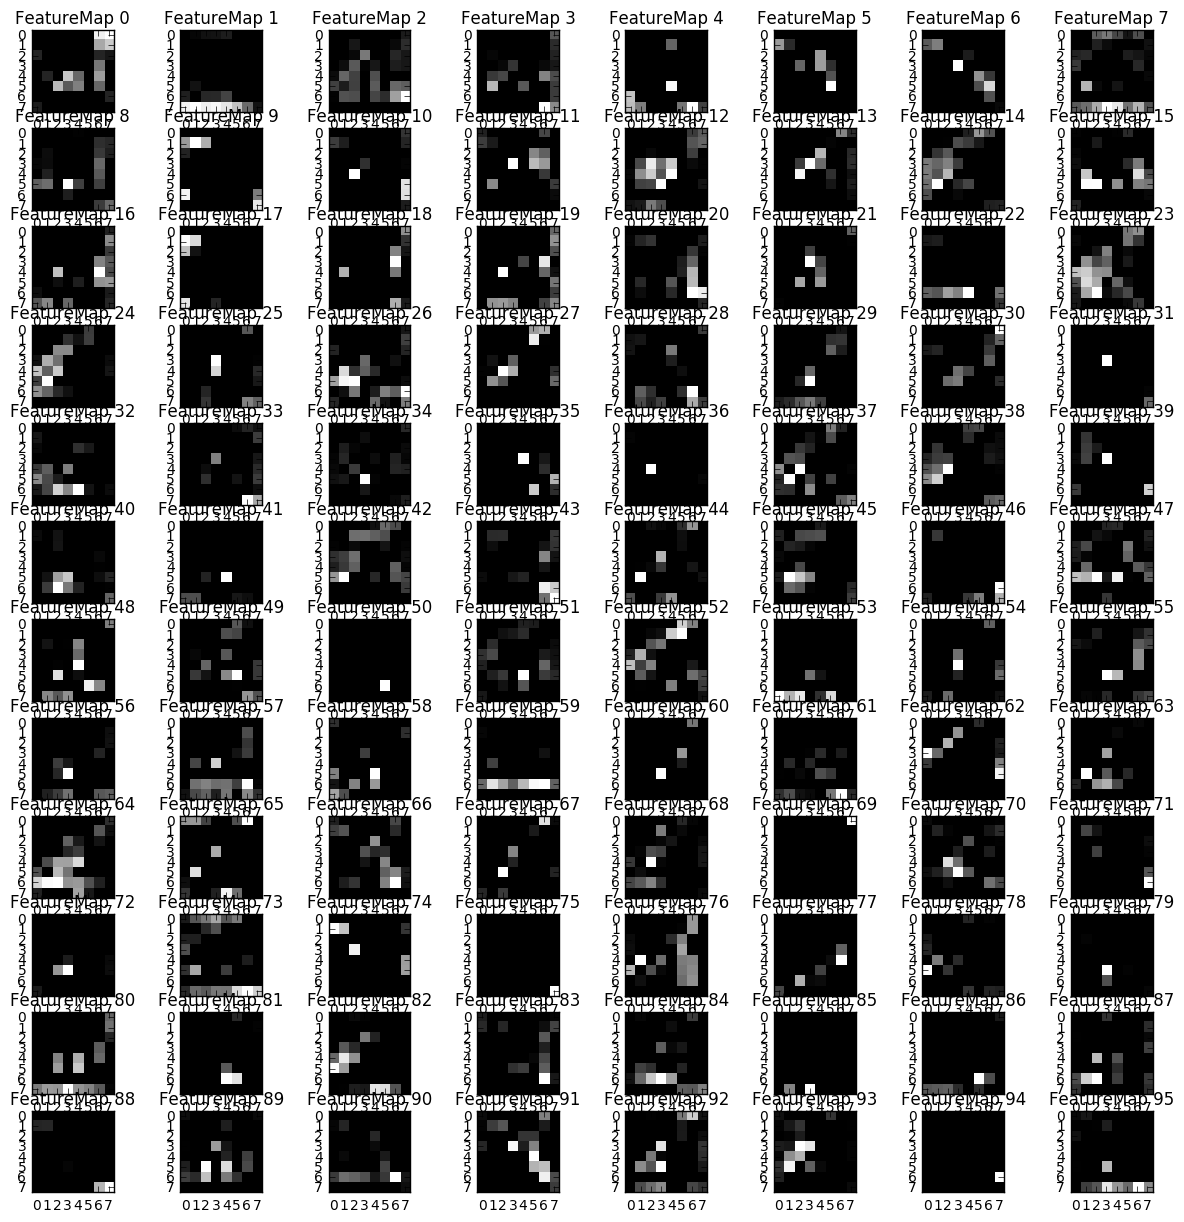

In [838]:
with tf.Session() as sess:
    saver.restore(sess, 'models/0.ckpt')
    outputFeatureMap([new_tests_norm[1]], act3)
    

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**